## Here, we used new training data that has randomized dispersions and phases to try and predict the dispersion as well as the phase.


In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [51]:
#Load the training data

subset = 5 #every 10 mV
start = 50 # for starting at -300mV

peak_names = ['peak1', 'peak2', 'peak3', 'peak4']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4']
width_names = ['width1', 'width2', 'width3','width4']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4']

energy = (pd.read_csv('Training_Data/Hexagon/HexagonBias_v4.csv', header=None)*1000).round().astype(int)
energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]
energy_names2 = energy_names[start::subset]
energy_names3 = energy_names[start::1]

col_names2 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']+ peak_names + locs_names + width_names + prom_names

col_names1 = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names

col_names_both = col_names2 + energy_names2
col_names_a = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'] + energy_names3

data1 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_specPoints.csv', header = None, names = col_names1)
data2 = pd.read_csv('Training_Data/Hexagon/HexagonTrainingData062718_v9_peakinfo.csv', header = None, names = col_names2)
save_data = True

data = data2.join(data1.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1), how = 'left')
data = data[col_names_both]

data1a = data1[col_names_a]

X1 = data1a.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y1 = data1a[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X2 = data2.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y2 = data2[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

X = data.drop(['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'], axis = 1)
Y = data[['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha']]

ts1 = 0.3
rs1 = 42

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1)


X1.head()

E_-300_mV  E_-298_mV  E_-296_mV  E_-294_mV  E_-292_mV  E_-290_mV  \
0    0.23882    0.23152    0.22630    0.22276    0.22095    0.22074   
1    0.13010    0.15006    0.17606    0.21197    0.26000    0.32613   
2    1.62320    1.67220    1.70830    1.73080    1.73810    1.73070   
3    6.39180    3.10470    1.76910    1.13750    0.79020    0.58400   
4    4.93760    3.75580    2.78690    2.08610    1.60270    1.26700   

   E_-288_mV  E_-286_mV  E_-284_mV  E_-282_mV    ...     E_482_mV  E_484_mV  \
0    0.22201    0.22486    0.22914    0.23508    ...      0.62323   0.62371   
1    0.42330    0.57633    0.82535    1.28060    ...      0.12581   0.12903   
2    1.70940    1.67590    1.63240    1.58160    ...      1.01510   1.01320   
3    0.45382    0.36610    0.30224    0.25473    ...      0.15534   0.15561   
4    1.02460    0.85055    0.72115    0.62208    ...      1.21800   1.23370   

   E_486_mV  E_488_mV  E_490_mV  E_492_mV  E_494_mV  E_496_mV  E_498_mV  \
0   0.62546   0.62839   0.63288   0.63869   0.64565   0.65423   0.66432   
1   0.13200   0.13683   0.14167   0.14810   0.15516   0.16464   0.17402   
2   1.01100   1.00870   1.00640   1.00370   1.00110   0.99801   0.99497   
3   0.15664   0.15788   0.15934   0.16199   0.16514   0.16840   0.17335   
4   1.25490   1.28390   1.32290   1.36940   1.42420   1.48600   1.55150   

   E_500_mV  
0   0.67559  
1   0.18740  
2   0.99171  
3   0.17833  
4   1.61830  

[5 rows x 401 columns]

In [46]:
data1a.head()

deltaI    deltaR      E_0    mstar   alpha    peak1    peak2    peak3  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764   9.8822   5.5667   3.6113   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511  18.0630  16.8260  12.9150   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972   1.7381   1.4604   1.2477   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051  14.0020  12.3480   8.9410   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126   5.8682   4.4592   3.2560   

    peak4   loc1   ...      loc3   loc4    width1    width2    width3  \
0  2.7913 -0.398   ...    -0.232 -0.084  0.001877  0.009717  0.019692   
1  9.8592 -0.378   ...    -0.124  0.072  0.003477  0.004698  0.007322   
2  1.1347 -0.292   ...     0.110  0.386  0.042705  0.056824  0.079090   
3  6.3451 -0.304   ...     0.060  0.308  0.005644  0.007879  0.010993   
4  2.4006 -0.302   ...     0.038  0.262  0.012698  0.019628  0.026555   

     width4    prom1     prom2     prom3    prom4  
0  0.029163   6.6222   5.34590   3.23250  2.25190  
1  0.009501  18.0080  16.74500  12.80400  9.73970  
2  0.080406   1.0521   0.62049   0.36429  0.14303  
3  0.014262  13.9150  12.22200   8.78560  6.14070  
4  0.032085   5.6336   4.10670   2.83680  1.88050  

[5 rows x 21 columns]

In [3]:
data2.head()

deltaI    deltaR      E_0    mstar   alpha    peak1    peak2    peak3  \
0  0.81472 -0.147980  0.41370  0.43701 -8.6764   9.8822   5.5667   3.6113   
1  0.09754 -1.133300  0.45569  0.44363 -5.3511  18.0630  16.8260  12.9150   
2  0.15761 -0.046193  0.49672  0.37281 -6.9972   1.7381   1.4604   1.2477   
3  0.14189 -0.908300  0.49257  0.41883 -5.4051  14.0020  12.3480   8.9410   
4  0.65574 -1.514700  0.48591  0.44010 -8.2126   5.8682   4.4592   3.2560   

    peak4   loc1   ...      loc3   loc4    width1    width2    width3  \
0  2.7913 -0.398   ...    -0.232 -0.084  0.001877  0.009717  0.019692   
1  9.8592 -0.378   ...    -0.124  0.072  0.003477  0.004698  0.007322   
2  1.1347 -0.292   ...     0.110  0.386  0.042705  0.056824  0.079090   
3  6.3451 -0.304   ...     0.060  0.308  0.005644  0.007879  0.010993   
4  2.4006 -0.302   ...     0.038  0.262  0.012698  0.019628  0.026555   

     width4    prom1     prom2     prom3    prom4  
0  0.029163   6.6222   5.34590   3.23250  2.25190  
1  0.009501  18.0080  16.74500  12.80400  9.73970  
2  0.080406   1.0521   0.62049   0.36429  0.14303  
3  0.014262  13.9150  12.22200   8.78560  6.14070  
4  0.032085   5.6336   4.10670   2.83680  1.88050  

[5 rows x 21 columns]

# Using the Best Models on the Hexagon Data 

## Statsmodels

### spec points

 
RMSE on test data: 1.1556678827277582 for  Delta I
R^2 Score on test data: -14.906706920118765 for Delta I
 
RMSE on test data: 0.6806914558975969 for  Delta R
R^2 Score on test data: -1.2937836041209696 for Delta R
 
RMSE on test data: 0.06193691533620863 for  E_0
R^2 Score on test data: -3.5662444879924067 for E_0
 
RMSE on test data: 0.09504406105898644 for  m star
R^2 Score on test data: -3.7489553243161655 for m star
 
RMSE on test data: 12.96948685271914 for  alpha
R^2 Score on test data: -19.37283557733294 for alpha
The average residual for predict: 0.3203
Residual is this percent of predict range 0.526 %
The average residual for predict: 0.4262
Residual is this percent of predict range 1.641 %


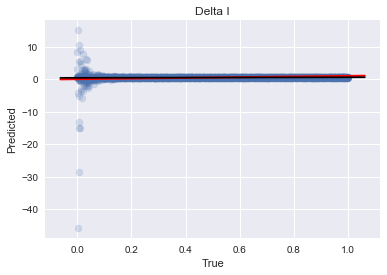

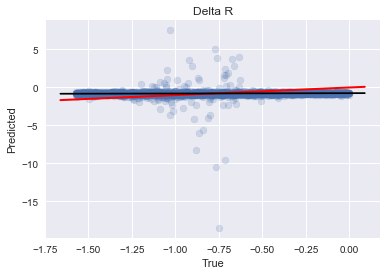

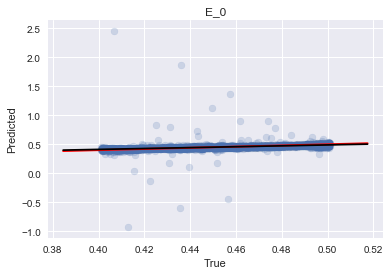

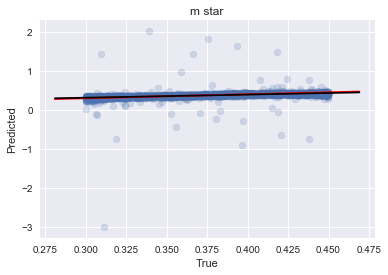

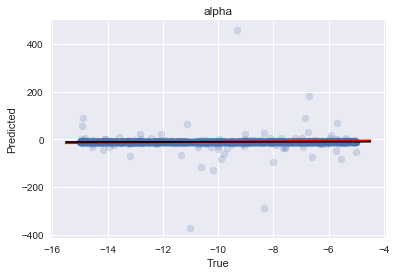

In [4]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_sp = sm.OLS(Y1_train['deltaI'], X1_train)
model_OLS_R_sp = sm.OLS(Y1_train['deltaR'], X1_train)
model_OLS_E0_sp = sm.OLS(Y1_train['E_0'], X1_train)
model_OLS_mstar_sp = sm.OLS(Y1_train['mstar'], X1_train)
model_OLS_alpha_sp = sm.OLS(Y1_train['alpha'], X1_train)

results_OLS_I_sp = model_OLS_I_sp.fit()
results_OLS_R_sp = model_OLS_R_sp.fit()
results_OLS_E0_sp = model_OLS_E0_sp.fit()
results_OLS_mstar_sp = model_OLS_mstar_sp.fit()
results_OLS_alpha_sp = model_OLS_alpha_sp.fit()

#Make predictions on testing data
predictions_OLS_I_sp = results_OLS_I_sp.predict(X1_test) # make the predictions by the model
predictions_OLS_R_sp = results_OLS_R_sp.predict(X1_test)
predictions_OLS_E0_sp = results_OLS_E0_sp.predict(X1_test)
predictions_OLS_mstar_sp = results_OLS_mstar_sp.predict(X1_test)
predictions_OLS_alpha_sp = results_OLS_alpha_sp.predict(X1_test)

scores_OLS = [r2_score(Y1_test['deltaI'], predictions_OLS_I_sp), 
              r2_score(Y1_test['deltaR'], predictions_OLS_R_sp), 
              r2_score(Y1_test['E_0'], predictions_OLS_E0_sp), 
              r2_score(Y1_test['mstar'], predictions_OLS_mstar_sp),
              r2_score(Y1_test['alpha'], predictions_OLS_alpha_sp) ]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y1_test['deltaI'], predictions_OLS_I_sp,'Delta I')
#ylim([-1,5])
plotSummary(Y1_test['deltaR'], predictions_OLS_R_sp, 'Delta R')
plotSummary(Y1_test['E_0'], predictions_OLS_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_OLS_mstar_sp, 'm star')
plotSummary(Y1_test['alpha'], predictions_OLS_alpha_sp, 'alpha')

myResiduals(Y1_test['deltaI'], predictions_OLS_I_sp)
myResiduals(Y1_test['deltaR'], predictions_OLS_R_sp)



### peak info

 
RMSE on test data: 0.23603858213143758 for  Delta I
R^2 Score on test data: 0.3364400193026921 for Delta I
 
RMSE on test data: 0.3068264168459187 for  Delta R
R^2 Score on test data: 0.533944816990081 for Delta R
 
RMSE on test data: 0.01666031427437437 for  E_0
R^2 Score on test data: 0.6696103791735911 for E_0
 
RMSE on test data: 0.03216746013400702 for  mstar
R^2 Score on test data: 0.45602159726069535 for mstar
 
RMSE on test data: 2.838941507362516 for  alpha
R^2 Score on test data: 0.0238450008284391 for alpha
The average residual for predict: 0.1911
Residual is this percent of predict range 6.105 %
The average residual for predict: 0.2469
Residual is this percent of predict range 7.387 %


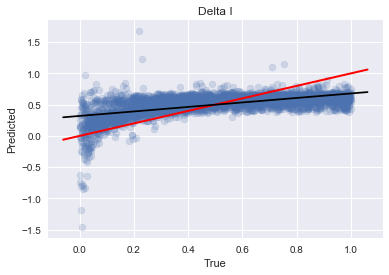

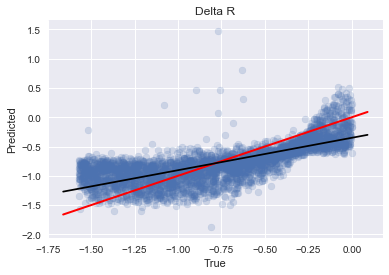

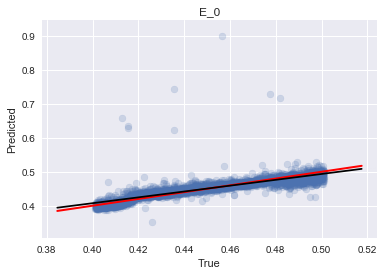

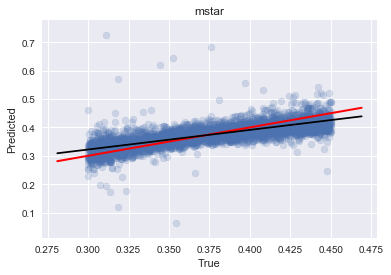

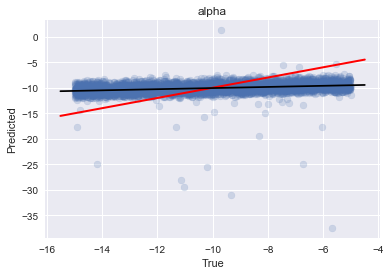

In [5]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_pi = sm.OLS(Y2_train['deltaI'], X2_train)
model_OLS_R_pi = sm.OLS(Y2_train['deltaR'], X2_train)
model_OLS_E0_pi = sm.OLS(Y2_train['E_0'], X2_train)
model_OLS_mstar_pi = sm.OLS(Y2_train['mstar'], X2_train)
model_OLS_alpha_pi = sm.OLS(Y2_train['alpha'], X2_train)

results_OLS_I_pi = model_OLS_I_pi.fit()
results_OLS_R_pi = model_OLS_R_pi.fit()
results_OLS_E0_pi = model_OLS_E0_pi.fit()
results_OLS_mstar_pi = model_OLS_mstar_pi.fit()
results_OLS_alpha_pi = model_OLS_alpha_pi.fit()

#Make predictions on testing data
predictions_OLS_I_pi = results_OLS_I_pi.predict(X2_test) # make the predictions by the model
predictions_OLS_R_pi = results_OLS_R_pi.predict(X2_test)
predictions_OLS_E0_pi = results_OLS_E0_pi.predict(X2_test)
predictions_OLS_mstar_pi = results_OLS_mstar_pi.predict(X2_test)
predictions_OLS_alpha_pi = results_OLS_alpha_pi.predict(X2_test)

scores_OLS_pi = [r2_score(Y2_test['deltaI'], predictions_OLS_I_pi), 
                 r2_score(Y2_test['deltaR'], predictions_OLS_R_pi), 
                 r2_score(Y2_test['E_0'], predictions_OLS_E0_pi), 
                 r2_score(Y2_test['mstar'], predictions_OLS_mstar_pi), 
                 r2_score(Y2_test['alpha'], predictions_OLS_alpha_pi)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y2_test['deltaI'], predictions_OLS_I_pi,'Delta I')
#ylim([-1,5])
plotSummary(Y2_test['deltaR'], predictions_OLS_R_pi, 'Delta R')

plotSummary(Y2_test['E_0'], predictions_OLS_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_OLS_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_OLS_alpha_pi, 'alpha')

myResiduals(Y2_test['deltaI'], predictions_OLS_I_pi)
myResiduals(Y2_test['deltaR'], predictions_OLS_R_pi)




### spec points and peak info

 
RMSE on test data: 0.23663489467356166 for  Delta I
R^2 Score on test data: 0.3330830345501722 for Delta I
 
RMSE on test data: 0.31788820018305186 for  Delta R
R^2 Score on test data: 0.49973437691051437 for Delta R
 
RMSE on test data: 0.014405171751933336 for  E_0
R^2 Score on test data: 0.7530000314899833 for E_0
 
RMSE on test data: 0.024445166798774117 for  mstar
R^2 Score on test data: 0.6858521262395327 for mstar
 
RMSE on test data: 2.752331235845324 for  alpha
R^2 Score on test data: 0.08249742564418394 for alpha
The average residual for predict: 0.1876
Residual is this percent of predict range 4.267 %
The average residual for predict: 0.2403
Residual is this percent of predict range 3.933 %


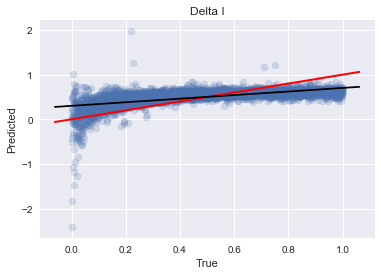

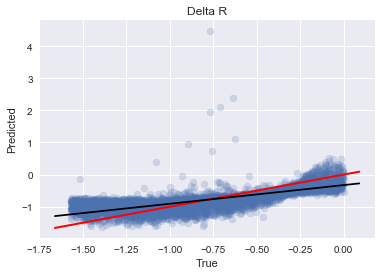

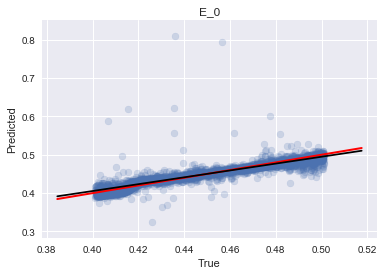

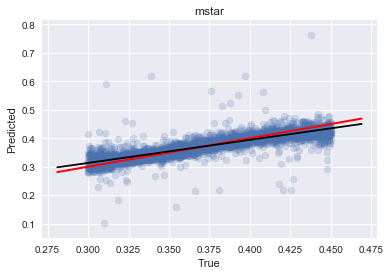

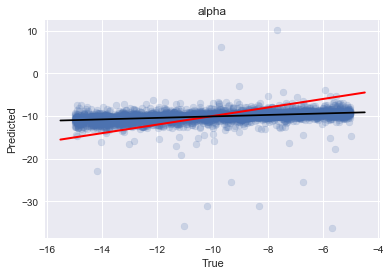

In [6]:
#Initialize and fit OLS model for deltaI 
model_OLS_I_both = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R_both = sm.OLS(Y_train['deltaR'], X_train)
model_OLS_E0_both = sm.OLS(Y_train['E_0'], X_train)
model_OLS_mstar_both = sm.OLS(Y_train['mstar'], X_train)
model_OLS_alpha_both = sm.OLS(Y_train['alpha'], X_train)

results_OLS_I_both = model_OLS_I_both.fit()
results_OLS_R_both = model_OLS_R_both.fit()
results_OLS_E0_both = model_OLS_E0_both.fit()
results_OLS_mstar_both = model_OLS_mstar_both.fit()
results_OLS_alpha_both = model_OLS_alpha_both.fit()

#Make predictions on testing data
predictions_OLS_I_both = results_OLS_I_both.predict(X_test) # make the predictions by the model
predictions_OLS_R_both = results_OLS_R_both.predict(X_test)
predictions_OLS_E0_both = results_OLS_E0_both.predict(X_test)
predictions_OLS_mstar_both = results_OLS_mstar_both.predict(X_test)
predictions_OLS_alpha_both = results_OLS_alpha_both.predict(X_test)

scores_OLS_both = [r2_score(Y_test['deltaI'], predictions_OLS_I_both), 
                   r2_score(Y_test['deltaR'], predictions_OLS_R_both), 
                   r2_score(Y_test['E_0'], predictions_OLS_E0_both), 
                   r2_score(Y_test['mstar'], predictions_OLS_mstar_both), 
                   r2_score(Y_test['alpha'], predictions_OLS_alpha_both)]

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I_both,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R_both, 'Delta R')

plotSummary(Y_test['E_0'], predictions_OLS_E0_both, 'E_0')
plotSummary(Y_test['mstar'], predictions_OLS_mstar_both, 'mstar')
plotSummary(Y_test['alpha'], predictions_OLS_alpha_both, 'alpha')

myResiduals(Y_test['deltaI'], predictions_OLS_I_both)
myResiduals(Y_test['deltaR'], predictions_OLS_R_both)



## Decision Tree 

### spec points

 
RMSE on test data: 0.25346119407198614 for  deltaI Depth 60
R^2 Score on test data: 0.2348666280489624 for deltaI Depth 60
 
RMSE on test data: 0.36691045443162396 for  deltaR Depth 60
R^2 Score on test data: 0.33354317759505425 for deltaR Depth 60
 
RMSE on test data: 0.018509583332061885 for  E_0
R^2 Score on test data: 0.5921942908705966 for E_0
 
RMSE on test data: 0.027365146947050036 for  mstar
R^2 Score on test data: 0.6063196991870993 for mstar
 
RMSE on test data: 2.7164066062781895 for  alpha
R^2 Score on test data: 0.10629240307275323 for alpha


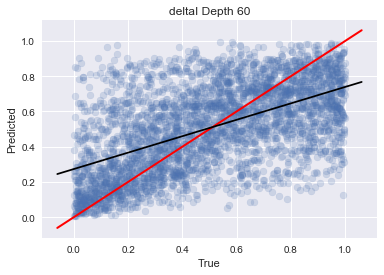

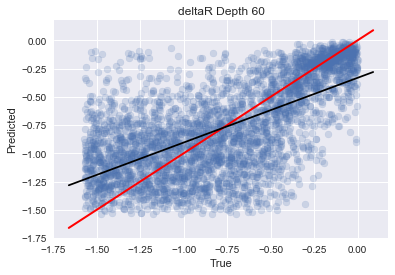

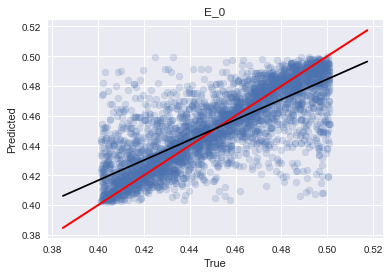

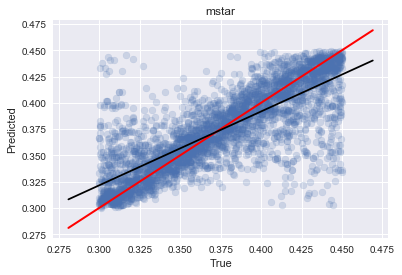

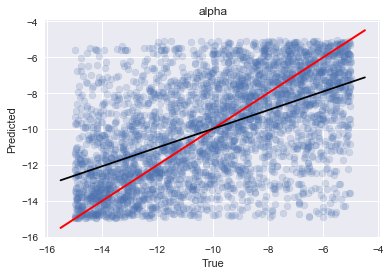

In [7]:
#Initialize the model
rs = 42
regr_DT_sp = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_sp = regr_DT_sp.fit(X1_train, Y1_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_sp = regr_DT_sp.predict(X1_test)

scores_DT = [r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0]), 
             r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1]),
             r2_score(Y1_test['E_0'], predictions_DT_sp[:,2]), 
             r2_score(Y1_test['mstar'], predictions_DT_sp[:,3]), 
             r2_score(Y1_test['alpha'], predictions_DT_sp[:,4]) ]

#Plot results
plotSummary(Y1_test['deltaI'], predictions_DT_sp[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y1_test['deltaR'], predictions_DT_sp[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y1_test['E_0'], predictions_DT_sp[:,2], 'E_0')
plotSummary(Y1_test['mstar'], predictions_DT_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_DT_sp[:,4], 'alpha')


### peak info

 
RMSE on test data: 0.1721403308762214 for  deltaI Depth 60
R^2 Score on test data: 0.6470774095768962 for deltaI Depth 60
 
RMSE on test data: 0.26858992749921823 for  deltaR Depth 60
R^2 Score on test data: 0.6428659248637407 for deltaR Depth 60
 
RMSE on test data: 0.019257686808506005 for  E_0 DT pi
R^2 Score on test data: 0.55856348422978 for E_0 DT pi
 
RMSE on test data: 0.021856047054293833 for  mstar DT pi
R^2 Score on test data: 0.7488741910741697 for mstar DT pi
 
RMSE on test data: 2.9746350467344267 for  alpha
R^2 Score on test data: -0.07170010810678162 for alpha


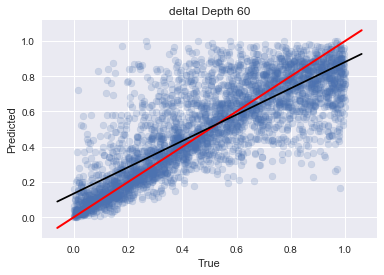

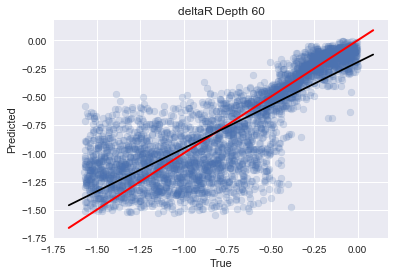

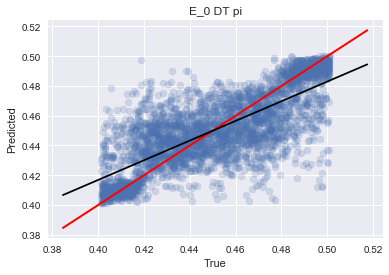

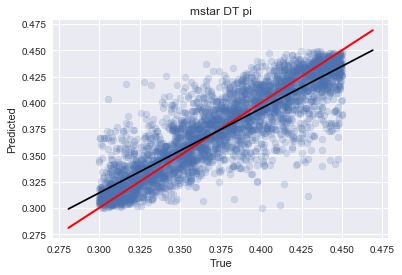

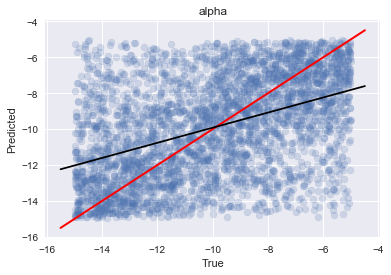

In [8]:
#Initialize the model
rs = 42
regr_DT_pi = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_pi.fit(X2_train, Y2_train)


#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_pi = regr_DT_pi.predict(X2_test)

scores_DT_pi = [r2_score(Y2_test['deltaI'], predictions_DT_pi[:,0]), 
                r2_score(Y2_test['deltaR'], predictions_DT_pi[:,1]), 
                r2_score(Y2_test['E_0'], predictions_DT_pi[:,2]), 
                r2_score(Y2_test['mstar'], predictions_DT_pi[:,3]), 
                r2_score(Y2_test['alpha'], predictions_DT_pi[:,4])]

#Plot results
plotSummary(Y2_test['deltaI'], predictions_DT_pi[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y2_test['deltaR'], predictions_DT_pi[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y2_test['E_0'], predictions_DT_pi[:,2], 'E_0 DT pi')
plotSummary(Y2_test['mstar'], predictions_DT_pi[:,3], 'mstar DT pi')
plotSummary(Y2_test['alpha'], predictions_DT_pi[:,4], 'alpha')

### spec points and peak info

 
RMSE on test data: 0.22300859643629256 for  deltaI Depth 60
R^2 Score on test data: 0.4076786319026301 for deltaI Depth 60
 
RMSE on test data: 0.3278037074912307 for  deltaR Depth 60
R^2 Score on test data: 0.46803927679596025 for deltaR Depth 60
 
RMSE on test data: 0.019679505240321922 for  E_0 DT both
R^2 Score on test data: 0.5390133295224833 for E_0 DT both
 
RMSE on test data: 0.02717540228110084 for  mstar DT both
R^2 Score on test data: 0.611760178931205 for mstar DT both
 
RMSE on test data: 2.8141777698418946 for  alpha
R^2 Score on test data: 0.04080048651928769 for alpha


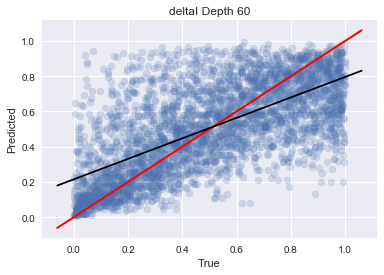

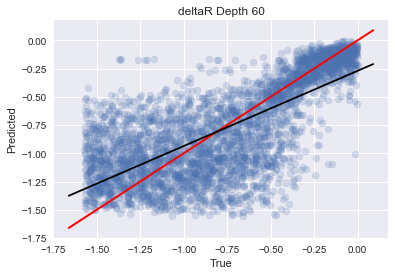

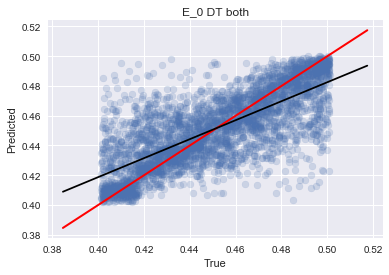

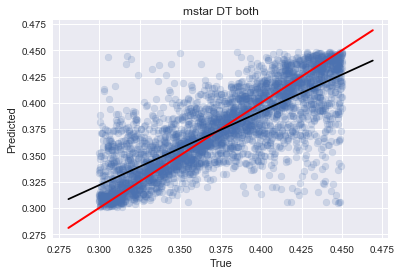

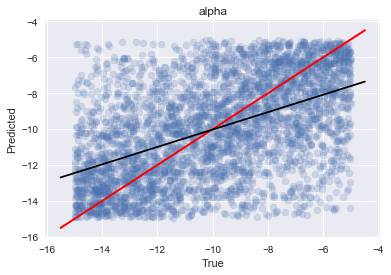

In [9]:
#Initialize the model
rs = 42
regr_DT_both = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2, random_state = rs)

#Fit the model
regr_DT_both.fit(X_train, Y_train)

#print(data1[data1['Regr - DT']>0.001])

#Use model to predict
predictions_DT_both = regr_DT_both.predict(X_test)

scores_DT_both = [r2_score(Y_test['deltaI'], predictions_DT_both[:,0]), 
                  r2_score(Y_test['deltaR'], predictions_DT_both[:,1]), 
                  r2_score(Y_test['E_0'], predictions_DT_both[:,2]), 
                  r2_score(Y_test['mstar'], predictions_DT_both[:,3]), 
                  r2_score(Y_test['alpha'], predictions_DT_both[:,4])]

#Plot results
plotSummary(Y_test['deltaI'], predictions_DT_both[:,0], 'deltaI Depth 60')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], predictions_DT_both[:,1], 'deltaR Depth 60')
#myResiduals(Y_test['deltaR'], y_3[:,1])

plotSummary(Y_test['E_0'], predictions_DT_both[:,2], 'E_0 DT both')
plotSummary(Y_test['mstar'], predictions_DT_both[:,3], 'mstar DT both')
plotSummary(Y_test['alpha'], predictions_DT_both[:,4], 'alpha')

## Random Forest

### spec points

 
RMSE on test data: 0.18181834104154124 for  deltaI 10
R^2 Score on test data: 0.606278099204129 for deltaI 10
 
RMSE on test data: 0.2520577189056307 for  deltaR 10
R^2 Score on test data: 0.6854774061072131 for deltaR 10
 
RMSE on test data: 0.010506253920221652 for  E0
R^2 Score on test data: 0.8686119696510906 for E0
 
RMSE on test data: 0.01448726734281917 for  mstar
R^2 Score on test data: 0.8896630273995754 for mstar
 
RMSE on test data: 1.826967563537378 for  alpha
R^2 Score on test data: 0.5957336742343076 for alpha


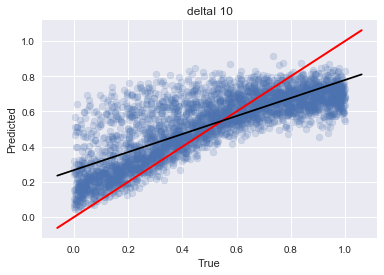

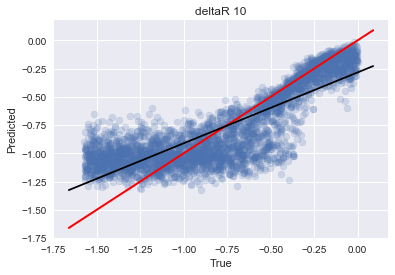

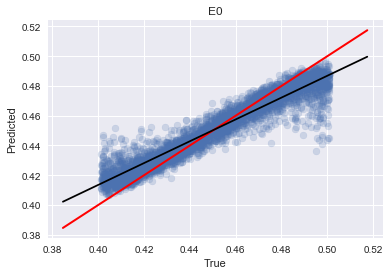

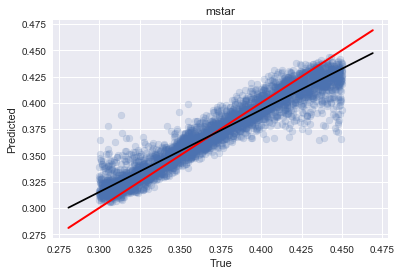

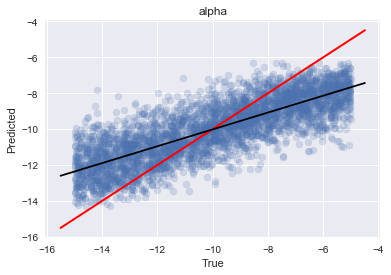

In [10]:
rs = 42
regr_RF_sp = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_sp = regr_RF_sp.fit(X1_train, Y1_train)

predictions_RF_sp = model_RF_sp.predict(X1_test)

scores_RF = [r2_score(Y1_test['deltaI'], predictions_RF_sp[:,0]), 
             r2_score(Y1_test['deltaR'], predictions_RF_sp[:,1]), 
             r2_score(Y1_test['E_0'], predictions_RF_sp[:,2]), 
             r2_score(Y1_test['mstar'], predictions_RF_sp[:,3]), 
             r2_score(Y1_test['alpha'], predictions_RF_sp[:,4])]

plotSummary(Y1_test['deltaI'], predictions_RF_sp[:,0], 'deltaI 10')
plotSummary(Y1_test['deltaR'], predictions_RF_sp[:,1], 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF_sp[:,2], 'E0')
plotSummary(Y1_test['mstar'], predictions_RF_sp[:,3], 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF_sp[:,4], 'alpha')



### peak info

 
RMSE on test data: 0.13103894721470422 for  deltaI 10
R^2 Score on test data: 0.7954897959925458 for deltaI 10
 
RMSE on test data: 0.21337117196660055 for  deltaR 10
R^2 Score on test data: 0.7746158710699965 for deltaR 10
 
RMSE on test data: 0.011673698302991439 for  E0
R^2 Score on test data: 0.8377902530657115 for E0
 
RMSE on test data: 0.012993199062939192 for  mstar
R^2 Score on test data: 0.9112475605398924 for mstar
 
RMSE on test data: 2.212177890305444 for  alpha
R^2 Score on test data: 0.4072849039850599 for alpha


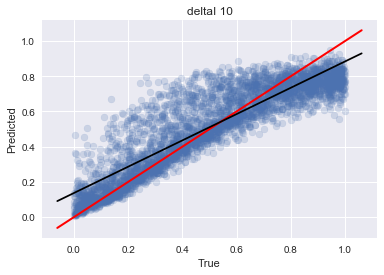

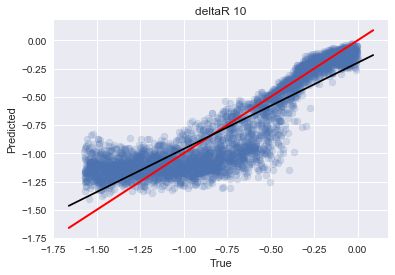

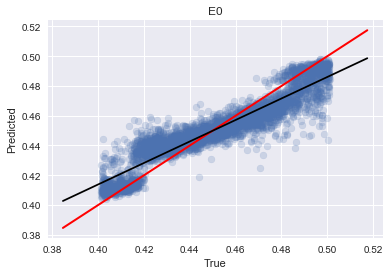

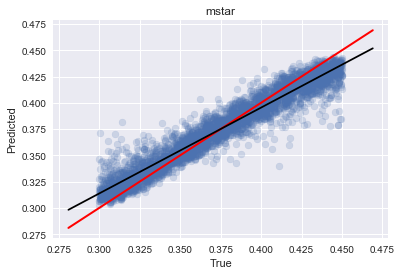

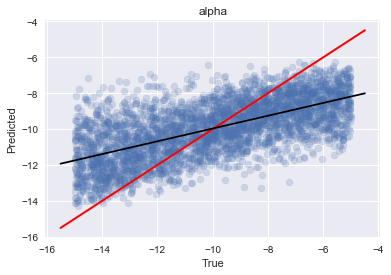

In [11]:
rs = 42
regr_RF_pi = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_pi = regr_RF_pi.fit(X2_train, Y2_train)

predictions_RF_pi = model_RF_pi.predict(X2_test)

scores_RF_pi = [r2_score(Y2_test['deltaI'], predictions_RF_pi[:,0]), 
             r2_score(Y2_test['deltaR'], predictions_RF_pi[:,1]), 
             r2_score(Y2_test['E_0'], predictions_RF_pi[:,2]), 
             r2_score(Y2_test['mstar'], predictions_RF_pi[:,3]), 
             r2_score(Y2_test['alpha'], predictions_RF_pi[:,4])]

plotSummary(Y2_test['deltaI'], predictions_RF_pi[:,0], 'deltaI 10')
plotSummary(Y2_test['deltaR'], predictions_RF_pi[:,1], 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF_pi[:,2], 'E0')
plotSummary(Y2_test['mstar'], predictions_RF_pi[:,3], 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF_pi[:,4], 'alpha')



### spec points and peak info

 
RMSE on test data: 0.16228605041779195 for  deltaI 10
R^2 Score on test data: 0.6863274076138988 for deltaI 10
 
RMSE on test data: 0.2382170018885135 for  deltaR 10
R^2 Score on test data: 0.7190704947358695 for deltaR 10
 
RMSE on test data: 0.010453447462412276 for  E0
R^2 Score on test data: 0.8699294135902936 for E0
 
RMSE on test data: 0.014459332115227755 for  mstar
R^2 Score on test data: 0.890088134031587 for mstar
 
RMSE on test data: 2.0257933908659758 for  alpha
R^2 Score on test data: 0.5029544459475657 for alpha


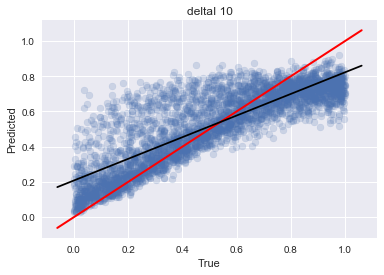

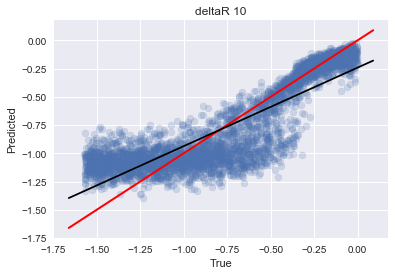

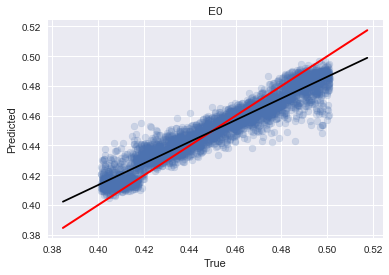

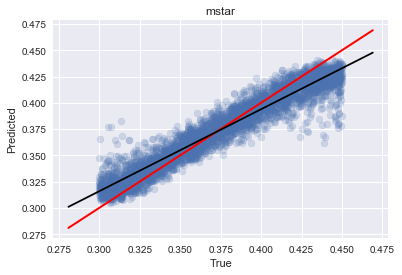

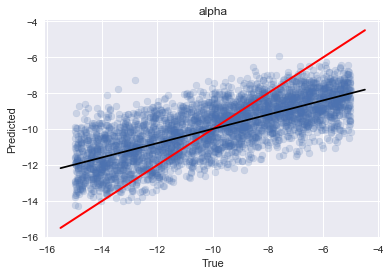

In [12]:
rs = 42
regr_RF_both = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF_both = regr_RF_both.fit(X_train, Y_train)

predictions_RF_both = model_RF_both.predict(X_test)

scores_RF_both = [r2_score(Y_test['deltaI'], predictions_RF_both[:,0]), 
             r2_score(Y_test['deltaR'], predictions_RF_both[:,1]), 
             r2_score(Y_test['E_0'], predictions_RF_both[:,2]), 
             r2_score(Y_test['mstar'], predictions_RF_both[:,3]), 
             r2_score(Y_test['alpha'], predictions_RF_both[:,4])]

plotSummary(Y_test['deltaI'], predictions_RF_both[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predictions_RF_both[:,1], 'deltaR 10')
plotSummary(Y_test['E_0'], predictions_RF_both[:,2], 'E0')
plotSummary(Y_test['mstar'], predictions_RF_both[:,3], 'mstar')
plotSummary(Y_test['alpha'], predictions_RF_both[:,4], 'alpha')



## Independent Random Forests

### spec points

 
RMSE on test data: 0.22966398576063202 for  deltaI 10
R^2 Score on test data: 0.7388815009573554 for deltaI 10
 
RMSE on test data: 0.14703520347549878 for  deltaR 10
R^2 Score on test data: 0.7425120881684903 for deltaR 10
 
RMSE on test data: 0.0037845655980130177 for  E_0
R^2 Score on test data: 0.98295126771875 for E_0
 
RMSE on test data: 0.00946213624084815 for  mstar
R^2 Score on test data: 0.9529319172166584 for mstar
 
RMSE on test data: 1.768077611407698 for  alpha
R^2 Score on test data: 0.6213756477330679 for alpha


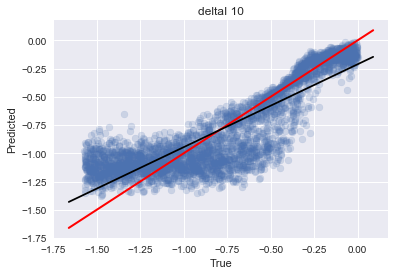

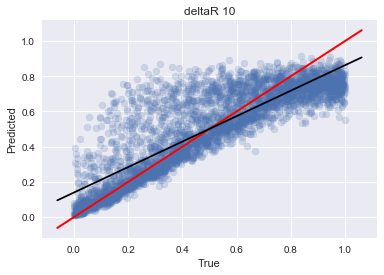

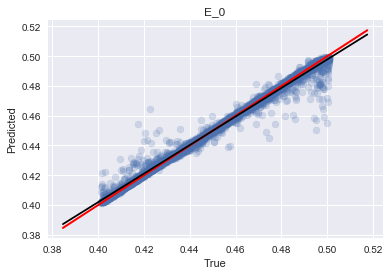

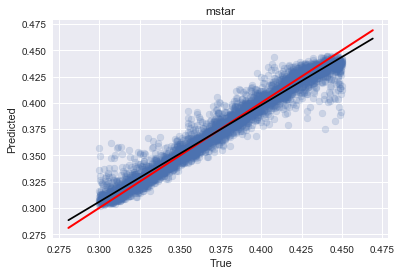

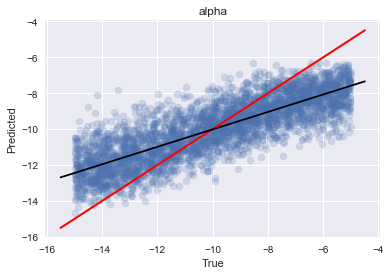

In [13]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_sp = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_sp = regr_RF2_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_RF2_di_sp = regr_RF2_di_sp.fit(X1_train, Y1_train['deltaI'])
model_RF2_E0_sp = regr_RF2_E0_sp.fit(X1_train, Y1_train['E_0'])
model_RF2_mstar_sp = regr_RF2_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_RF2_alpha_sp = regr_RF2_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_RF2_dr_sp = model_RF2_dr_sp.predict(X1_test)
predictions_RF2_di_sp = model_RF2_di_sp.predict(X1_test)
predictions_RF2_E0_sp = model_RF2_E0_sp.predict(X1_test)
predictions_RF2_mstar_sp = model_RF2_mstar_sp.predict(X1_test)
predictions_RF2_alpha_sp = model_RF2_alpha_sp.predict(X1_test)

scores_RF2 = [r2_score(Y1_test['deltaI'], predictions_RF2_di_sp), 
              r2_score(Y1_test['deltaR'], predictions_RF2_dr_sp), 
              r2_score(Y1_test['E_0'], predictions_RF2_E0_sp), 
              r2_score(Y1_test['mstar'], predictions_RF2_mstar_sp), 
              r2_score(Y1_test['alpha'], predictions_RF2_alpha_sp)]

plotSummary(Y1_test['deltaR'], predictions_RF2_dr_sp, 'deltaI 10')
plotSummary(Y1_test['deltaI'], predictions_RF2_di_sp, 'deltaR 10')
plotSummary(Y1_test['E_0'], predictions_RF2_E0_sp, 'E_0')
plotSummary(Y1_test['mstar'], predictions_RF2_mstar_sp, 'mstar')
plotSummary(Y1_test['alpha'], predictions_RF2_alpha_sp, 'alpha')



### peak info

 
RMSE on test data: 0.15191386126351292 for  deltaI 10
R^2 Score on test data: 0.8857525144626487 for deltaI 10
 
RMSE on test data: 0.07630634682362028 for  deltaR 10
R^2 Score on test data: 0.930651748467393 for deltaR 10
 
RMSE on test data: 0.00379160831401083 for  E_0
R^2 Score on test data: 0.9828877565466987 for E_0
 
RMSE on test data: 0.009237323015185395 for  mstar
R^2 Score on test data: 0.9551419515452266 for mstar
 
RMSE on test data: 2.1296954083827875 for  alpha
R^2 Score on test data: 0.4506604305703227 for alpha


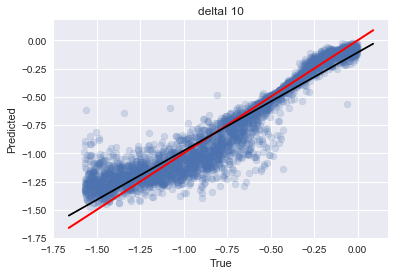

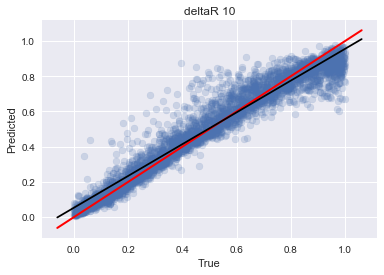

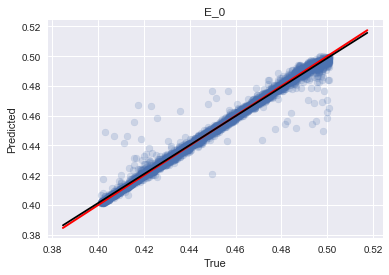

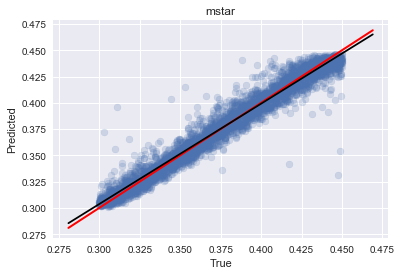

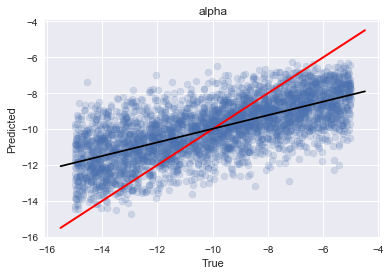

In [14]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_pi = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_pi = regr_RF2_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_RF2_di_pi = regr_RF2_di_pi.fit(X2_train, Y2_train['deltaI'])
model_RF2_E0_pi = regr_RF2_E0_pi.fit(X2_train, Y2_train['E_0'])
model_RF2_mstar_pi = regr_RF2_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_RF2_alpha_pi = regr_RF2_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_RF2_dr_pi = model_RF2_dr_pi.predict(X2_test)
predictions_RF2_di_pi = model_RF2_di_pi.predict(X2_test)
predictions_RF2_E0_pi = model_RF2_E0_pi.predict(X2_test)
predictions_RF2_mstar_pi = model_RF2_mstar_pi.predict(X2_test)
predictions_RF2_alpha_pi = model_RF2_alpha_pi.predict(X2_test)

scores_RF2_pi = [r2_score(Y2_test['deltaI'], predictions_RF2_di_pi), 
              r2_score(Y2_test['deltaR'], predictions_RF2_dr_pi), 
              r2_score(Y2_test['E_0'], predictions_RF2_E0_pi), 
              r2_score(Y2_test['mstar'], predictions_RF2_mstar_pi), 
              r2_score(Y2_test['alpha'], predictions_RF2_alpha_pi)]

plotSummary(Y2_test['deltaR'], predictions_RF2_dr_pi, 'deltaI 10')
plotSummary(Y2_test['deltaI'], predictions_RF2_di_pi, 'deltaR 10')
plotSummary(Y2_test['E_0'], predictions_RF2_E0_pi, 'E_0')
plotSummary(Y2_test['mstar'], predictions_RF2_mstar_pi, 'mstar')
plotSummary(Y2_test['alpha'], predictions_RF2_alpha_pi, 'alpha')

### spec points and peak info

 
RMSE on test data: 0.1903446675867918 for  deltaI 10
R^2 Score on test data: 0.820636828312217 for deltaI 10
 
RMSE on test data: 0.0930676616503881 for  deltaR 10
R^2 Score on test data: 0.8968398901266911 for deltaR 10
 
RMSE on test data: 0.003982131452612587 for  E_0
R^2 Score on test data: 0.9811248156937308 for E_0
 
RMSE on test data: 0.00933740136319735 for  mstar
R^2 Score on test data: 0.9541646904254497 for mstar
 
RMSE on test data: 1.7603394129585719 for  alpha
R^2 Score on test data: 0.6246825827866793 for alpha


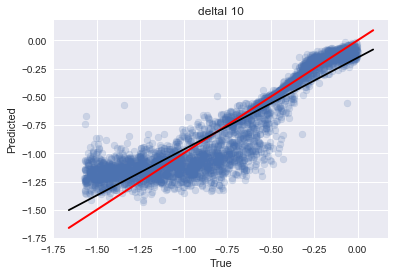

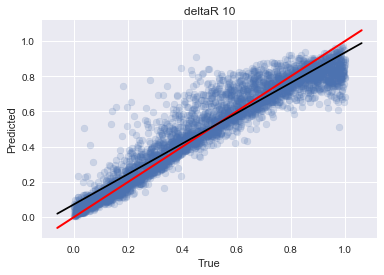

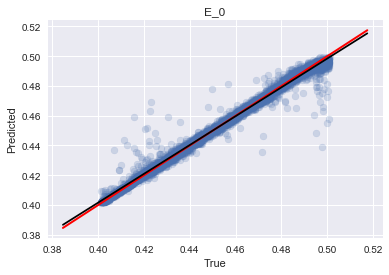

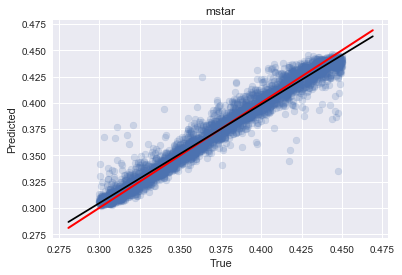

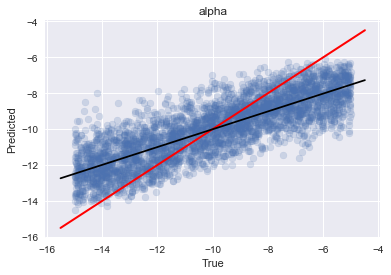

In [15]:
#Trying Independent Random Forest

rs = 42
md = 40
n = 40

regr_RF2_dr_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_di_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_E0_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_mstar_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)
regr_RF2_alpha_both = RandomForestRegressor(max_depth = md, n_estimators = n, random_state = rs)


model_RF2_dr_both = regr_RF2_dr_both.fit(X_train, Y_train['deltaR'])
model_RF2_di_both = regr_RF2_di_both.fit(X_train, Y_train['deltaI'])
model_RF2_E0_both = regr_RF2_E0_both.fit(X_train, Y_train['E_0'])
model_RF2_mstar_both = regr_RF2_mstar_both.fit(X_train, Y_train['mstar'])
model_RF2_alpha_both = regr_RF2_alpha_both.fit(X_train, Y_train['alpha'])

predictions_RF2_dr_both = model_RF2_dr_both.predict(X_test)
predictions_RF2_di_both = model_RF2_di_both.predict(X_test)
predictions_RF2_E0_both = model_RF2_E0_both.predict(X_test)
predictions_RF2_mstar_both = model_RF2_mstar_both.predict(X_test)
predictions_RF2_alpha_both = model_RF2_alpha_both.predict(X_test)

scores_RF2_both = [r2_score(Y_test['deltaI'], predictions_RF2_di_both), 
              r2_score(Y_test['deltaR'], predictions_RF2_dr_both), 
              r2_score(Y_test['E_0'], predictions_RF2_E0_both), 
              r2_score(Y_test['mstar'], predictions_RF2_mstar_both), 
              r2_score(Y_test['alpha'], predictions_RF2_alpha_both)]

plotSummary(Y_test['deltaR'], predictions_RF2_dr_both, 'deltaI 10')
plotSummary(Y_test['deltaI'], predictions_RF2_di_both, 'deltaR 10')
plotSummary(Y_test['E_0'], predictions_RF2_E0_both, 'E_0')
plotSummary(Y_test['mstar'], predictions_RF2_mstar_both, 'mstar')
plotSummary(Y_test['alpha'], predictions_RF2_alpha_both, 'alpha')

## AdaBoost Random Forest 

### spec points

 
RMSE on test data: 0.15463547869416025 for  AdaBoost Delta I
R^2 Score on test data: 0.7152049230798889 for AdaBoost Delta I
 
RMSE on test data: 0.23869157818987116 for  AdaBoost Delta R
R^2 Score on test data: 0.7179500433228341 for AdaBoost Delta R
 
RMSE on test data: 0.0029147979642042457 for  AdaBoost E_0
R^2 Score on test data: 0.9898870716211117 for AdaBoost E_0
 
RMSE on test data: 0.008591692039688771 for  AdaBoost mstar
R^2 Score on test data: 0.9611934067775739 for AdaBoost mstar
 
RMSE on test data: 1.8188255419603212 for  AdaBoost alpha
R^2 Score on test data: 0.5993289330671967 for AdaBoost alpha


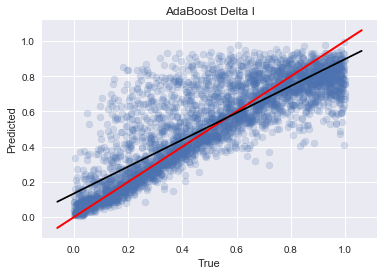

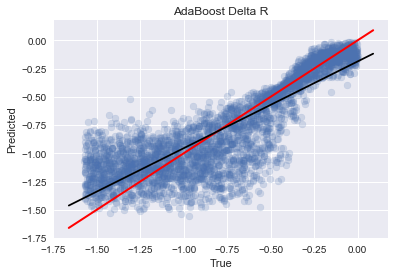

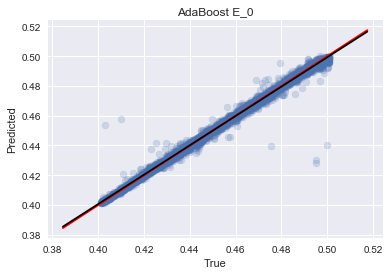

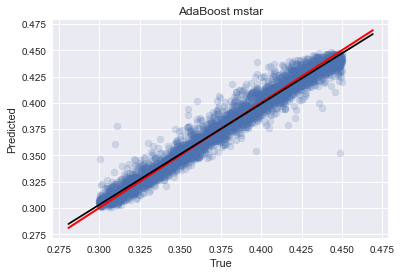

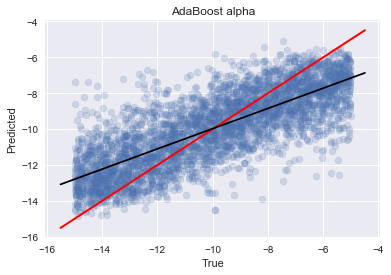

In [16]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_sp = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_sp = regr_AB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_AB_dr_sp = regr_AB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_AB_E0_sp = regr_AB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_AB_mstar_sp = regr_AB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_AB_alpha_sp = regr_AB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_AB_di_sp = model_AB_di_sp.predict(X1_test)
predictions_AB_dr_sp = model_AB_dr_sp.predict(X1_test)
predictions_AB_E0_sp = model_AB_E0_sp.predict(X1_test)
predictions_AB_mstar_sp = model_AB_mstar_sp.predict(X1_test)
predictions_AB_alpha_sp = model_AB_alpha_sp.predict(X1_test)

scores_AB = [r2_score(Y1_test['deltaI'], predictions_AB_di_sp), 
             r2_score(Y1_test['deltaR'], predictions_AB_dr_sp), 
             r2_score(Y1_test['E_0'], predictions_AB_E0_sp), 
             r2_score(Y1_test['mstar'], predictions_AB_mstar_sp), 
             r2_score(Y1_test['alpha'], predictions_AB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_AB_di_sp, 'AdaBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_AB_dr_sp, 'AdaBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_AB_E0_sp, 'AdaBoost E_0')
plotSummary(Y1_test['mstar'], predictions_AB_mstar_sp, 'AdaBoost mstar')
plotSummary(Y1_test['alpha'], predictions_AB_alpha_sp, 'AdaBoost alpha')


### peak info

 
RMSE on test data: 0.07592225284754535 for  AdaBoost Delta I
R^2 Score on test data: 0.9313481311132963 for AdaBoost Delta I
 
RMSE on test data: 0.15455552685751672 for  AdaBoost Delta R
R^2 Score on test data: 0.8817446152981114 for AdaBoost Delta R
 
RMSE on test data: 0.004153962766569254 for  AdaBoost E_0
R^2 Score on test data: 0.9794607199999151 for AdaBoost E_0
 
RMSE on test data: 0.009662046372714311 for  AdaBoost mstar
R^2 Score on test data: 0.9509220572380291 for AdaBoost mstar
 
RMSE on test data: 2.307591557671821 for  AdaBoost alpha
R^2 Score on test data: 0.3550533719313024 for AdaBoost alpha


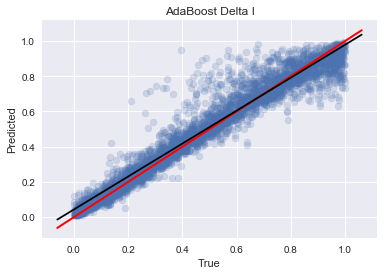

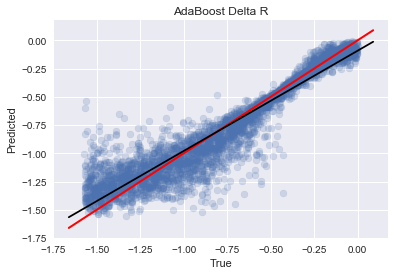

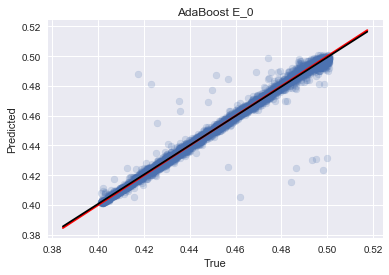

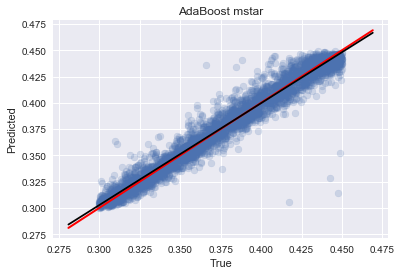

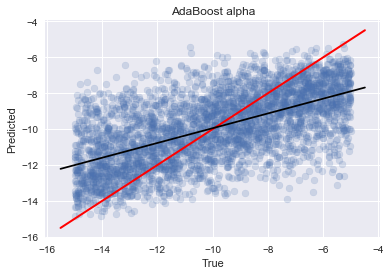

In [17]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_pi = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_pi = regr_AB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_AB_dr_pi = regr_AB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_AB_E0_pi = regr_AB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_AB_mstar_pi = regr_AB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_AB_alpha_pi = regr_AB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_AB_di_pi = model_AB_di_pi.predict(X2_test)
predictions_AB_dr_pi = model_AB_dr_pi.predict(X2_test)
predictions_AB_E0_pi = model_AB_E0_pi.predict(X2_test)
predictions_AB_mstar_pi = model_AB_mstar_pi.predict(X2_test)
predictions_AB_alpha_pi = model_AB_alpha_pi.predict(X2_test)

scores_AB_pi = [r2_score(Y2_test['deltaI'], predictions_AB_di_pi), 
             r2_score(Y2_test['deltaR'], predictions_AB_dr_pi), 
             r2_score(Y2_test['E_0'], predictions_AB_E0_pi), 
             r2_score(Y2_test['mstar'], predictions_AB_mstar_pi), 
             r2_score(Y2_test['alpha'], predictions_AB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_AB_di_pi, 'AdaBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_AB_dr_pi, 'AdaBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_AB_E0_pi, 'AdaBoost E_0')
plotSummary(Y2_test['mstar'], predictions_AB_mstar_pi, 'AdaBoost mstar')
plotSummary(Y2_test['alpha'], predictions_AB_alpha_pi, 'AdaBoost alpha')

### spec points and peak info

 
RMSE on test data: 0.0984151325780983 for  AdaBoost Delta I
R^2 Score on test data: 0.88464459316893 for AdaBoost Delta I
 
RMSE on test data: 0.2015105134137248 for  AdaBoost Delta R
R^2 Score on test data: 0.7989762989727061 for AdaBoost Delta R
 
RMSE on test data: 0.003188282739001858 for  AdaBoost E_0
R^2 Score on test data: 0.9879003259154004 for AdaBoost E_0
 
RMSE on test data: 0.009311831912582147 for  AdaBoost mstar
R^2 Score on test data: 0.9544153766634331 for AdaBoost mstar
 
RMSE on test data: 1.8106127779745798 for  AdaBoost alpha
R^2 Score on test data: 0.6029391612850178 for AdaBoost alpha


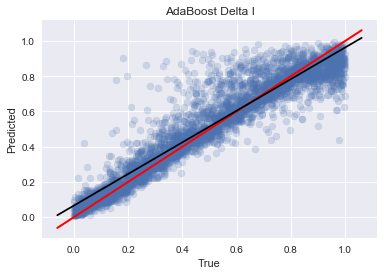

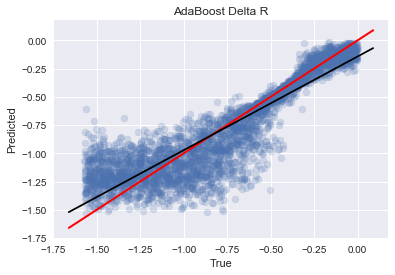

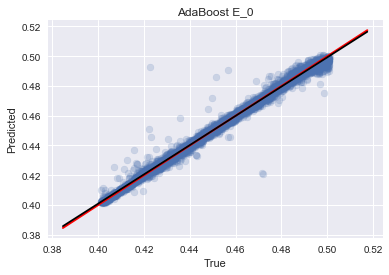

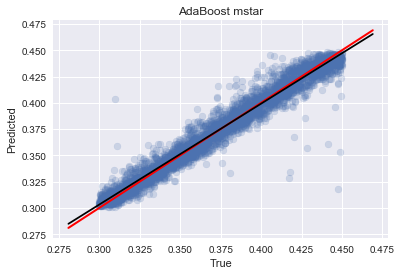

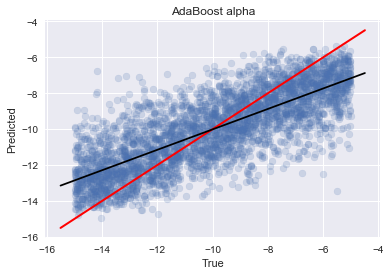

In [18]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB_di_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_AB_dr_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_E0_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_mstar_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)
regr_AB_alpha_both = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB_di_both = regr_AB_di_both.fit(X_train, Y_train['deltaI'])
model_AB_dr_both = regr_AB_dr_both.fit(X_train, Y_train['deltaR'])
model_AB_E0_both = regr_AB_E0_both.fit(X_train, Y_train['E_0'])
model_AB_mstar_both = regr_AB_mstar_both.fit(X_train, Y_train['mstar'])
model_AB_alpha_both = regr_AB_alpha_both.fit(X_train, Y_train['alpha'])

predictions_AB_di_both = model_AB_di_both.predict(X_test)
predictions_AB_dr_both = model_AB_dr_both.predict(X_test)
predictions_AB_E0_both = model_AB_E0_both.predict(X_test)
predictions_AB_mstar_both = model_AB_mstar_both.predict(X_test)
predictions_AB_alpha_both = model_AB_alpha_both.predict(X_test)

scores_AB_both = [r2_score(Y_test['deltaI'], predictions_AB_di_both), 
             r2_score(Y_test['deltaR'], predictions_AB_dr_both), 
             r2_score(Y_test['E_0'], predictions_AB_E0_both), 
             r2_score(Y_test['mstar'], predictions_AB_mstar_both), 
             r2_score(Y_test['alpha'], predictions_AB_alpha_both)]

plotSummary(Y_test['deltaI'], predictions_AB_di_both, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_AB_dr_both, 'AdaBoost Delta R')
plotSummary(Y_test['E_0'], predictions_AB_E0_both, 'AdaBoost E_0')
plotSummary(Y_test['mstar'], predictions_AB_mstar_both, 'AdaBoost mstar')
plotSummary(Y_test['alpha'], predictions_AB_alpha_both, 'AdaBoost alpha')

## Gradient Boosting Random Forest 

### spec points

 
RMSE on test data: 0.18641500335341396 for  GradientBoost Delta I
R^2 Score on test data: 0.5861185923642314 for GradientBoost Delta I
 
RMSE on test data: 0.2968923863421757 for  GradientBoost Delta R
R^2 Score on test data: 0.5636349427439136 for GradientBoost Delta R
 
RMSE on test data: 0.0047760161326761115 for  GradientBoost E_0
R^2 Score on test data: 0.972848640088463 for GradientBoost E_0
 
RMSE on test data: 0.01359968624530172 for  GradientBoost mstar
R^2 Score on test data: 0.9027687447086226 for GradientBoost mstar
 
RMSE on test data: 2.489401733866911 for  GradientBoost alpha
R^2 Score on test data: 0.24942193382611066 for GradientBoost alpha


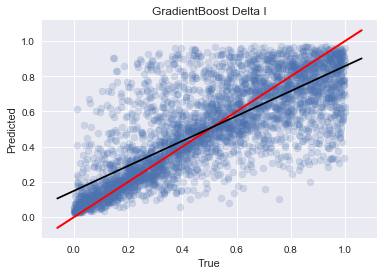

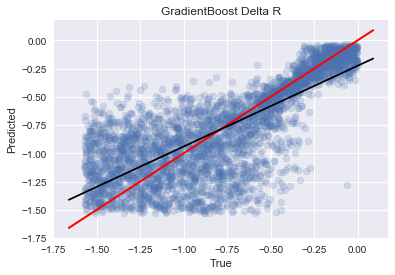

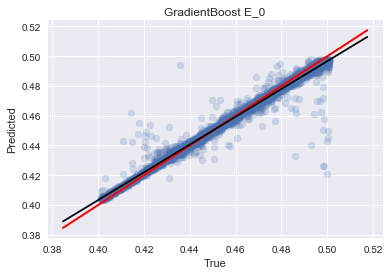

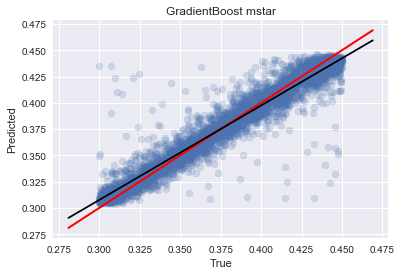

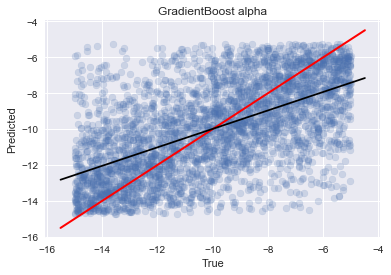

In [19]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_sp = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_sp = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_sp = regr_GB_di_sp.fit(X1_train, Y1_train['deltaI'])
model_GB_dr_sp = regr_GB_dr_sp.fit(X1_train, Y1_train['deltaR'])
model_GB_E0_sp = regr_GB_E0_sp.fit(X1_train, Y1_train['E_0'])
model_GB_mstar_sp = regr_GB_mstar_sp.fit(X1_train, Y1_train['mstar'])
model_GB_alpha_sp = regr_GB_alpha_sp.fit(X1_train, Y1_train['alpha'])

predictions_GB_di_sp = model_GB_di_sp.predict(X1_test)
predictions_GB_dr_sp = model_GB_dr_sp.predict(X1_test)
predictions_GB_E0_sp = model_GB_E0_sp.predict(X1_test)
predictions_GB_mstar_sp = model_GB_mstar_sp.predict(X1_test)
predictions_GB_alpha_sp = model_GB_alpha_sp.predict(X1_test)

scores_GB = [r2_score(Y1_test['deltaI'], predictions_GB_di_sp), 
             r2_score(Y1_test['deltaR'], predictions_GB_dr_sp), 
             r2_score(Y1_test['E_0'], predictions_GB_E0_sp), 
             r2_score(Y1_test['mstar'], predictions_GB_mstar_sp), 
             r2_score(Y1_test['alpha'], predictions_GB_alpha_sp)]

plotSummary(Y1_test['deltaI'], predictions_GB_di_sp, 'GradientBoost Delta I')
plotSummary(Y1_test['deltaR'], predictions_GB_dr_sp, 'GradientBoost Delta R')
plotSummary(Y1_test['E_0'], predictions_GB_E0_sp, 'GradientBoost E_0')
plotSummary(Y1_test['mstar'], predictions_GB_mstar_sp, 'GradientBoost mstar')
plotSummary(Y1_test['alpha'], predictions_GB_alpha_sp, 'GradientBoost alpha')




### peak info

 
RMSE on test data: 0.09538727720062569 for  GradientBoost Delta I
R^2 Score on test data: 0.8916334877863422 for GradientBoost Delta I
 
RMSE on test data: 0.2050225665668637 for  GradientBoost Delta R
R^2 Score on test data: 0.7919080991979627 for GradientBoost Delta R
 
RMSE on test data: 0.005436630010942693 for  GradientBoost E_0
R^2 Score on test data: 0.9648180770791825 for GradientBoost E_0
 
RMSE on test data: 0.01122455781205829 for  GradientBoost mstar
R^2 Score on test data: 0.9337651439273603 for GradientBoost mstar
 
RMSE on test data: 2.7733865899646633 for  GradientBoost alpha
R^2 Score on test data: 0.06840592816500646 for GradientBoost alpha


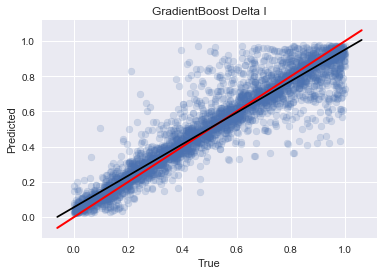

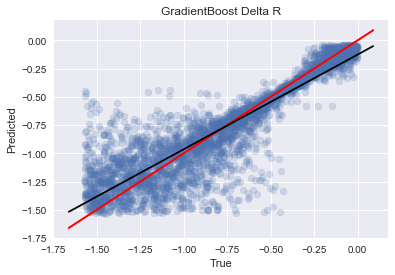

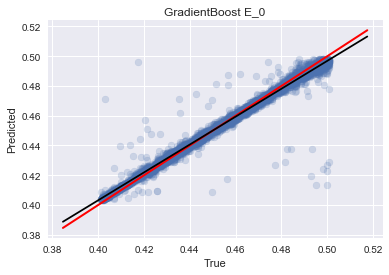

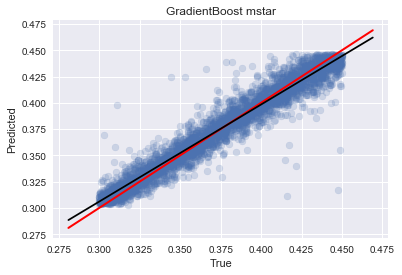

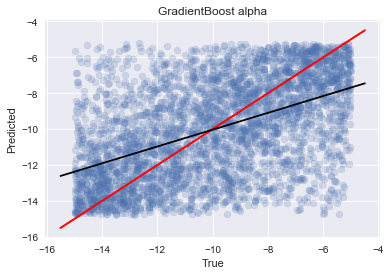

In [20]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_pi = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_pi = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_pi = regr_GB_di_pi.fit(X2_train, Y2_train['deltaI'])
model_GB_dr_pi = regr_GB_dr_pi.fit(X2_train, Y2_train['deltaR'])
model_GB_E0_pi = regr_GB_E0_pi.fit(X2_train, Y2_train['E_0'])
model_GB_mstar_pi = regr_GB_mstar_pi.fit(X2_train, Y2_train['mstar'])
model_GB_alpha_pi = regr_GB_alpha_pi.fit(X2_train, Y2_train['alpha'])

predictions_GB_di_pi = model_GB_di_pi.predict(X2_test)
predictions_GB_dr_pi = model_GB_dr_pi.predict(X2_test)
predictions_GB_E0_pi = model_GB_E0_pi.predict(X2_test)
predictions_GB_mstar_pi = model_GB_mstar_pi.predict(X2_test)
predictions_GB_alpha_pi = model_GB_alpha_pi.predict(X2_test)

scores_GB_pi = [r2_score(Y2_test['deltaI'], predictions_GB_di_pi), 
             r2_score(Y2_test['deltaR'], predictions_GB_dr_pi), 
             r2_score(Y2_test['E_0'], predictions_GB_E0_pi), 
             r2_score(Y2_test['mstar'], predictions_GB_mstar_pi), 
             r2_score(Y2_test['alpha'], predictions_GB_alpha_pi)]

plotSummary(Y2_test['deltaI'], predictions_GB_di_pi, 'GradientBoost Delta I')
plotSummary(Y2_test['deltaR'], predictions_GB_dr_pi, 'GradientBoost Delta R')
plotSummary(Y2_test['E_0'], predictions_GB_E0_pi, 'GradientBoost E_0')
plotSummary(Y2_test['mstar'], predictions_GB_mstar_pi, 'GradientBoost mstar')
plotSummary(Y2_test['alpha'], predictions_GB_alpha_pi, 'GradientBoost alpha')



### spec points and peak info

 
RMSE on test data: 0.1167737593675341 for  GradientBoost Delta I
R^2 Score on test data: 0.8375930107588788 for GradientBoost Delta I
 
RMSE on test data: 0.25458598000723986 for  GradientBoost Delta R
R^2 Score on test data: 0.6791361336396011 for GradientBoost Delta R
 
RMSE on test data: 0.005267492276689808 for  GradientBoost E_0
R^2 Score on test data: 0.9669730984781982 for GradientBoost E_0
 
RMSE on test data: 0.012511377613905592 for  GradientBoost mstar
R^2 Score on test data: 0.9177078557444623 for GradientBoost mstar
 
RMSE on test data: 2.393141179745025 for  GradientBoost alpha
R^2 Score on test data: 0.3063465774095665 for GradientBoost alpha


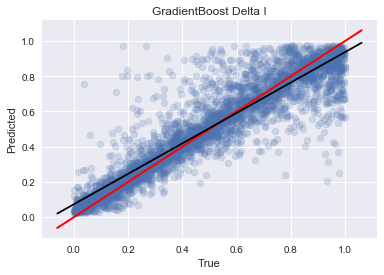

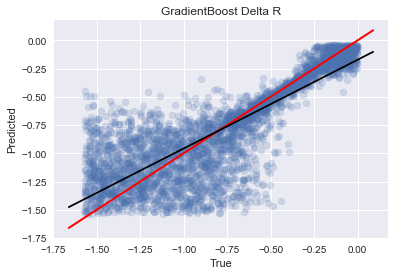

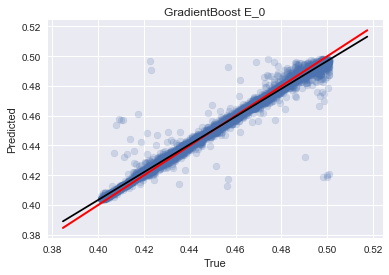

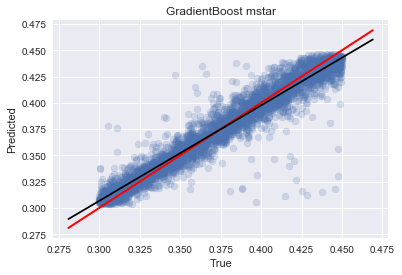

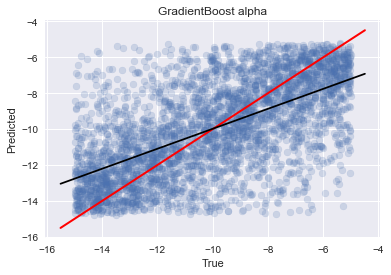

In [21]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 30


regr_GB_di_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_dr_both = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_E0_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_mstar_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)
regr_GB_alpha_both = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB_di_both = regr_GB_di_both.fit(X_train, Y_train['deltaI'])
model_GB_dr_both = regr_GB_dr_both.fit(X_train, Y_train['deltaR'])
model_GB_E0_both = regr_GB_E0_both.fit(X_train, Y_train['E_0'])
model_GB_mstar_both = regr_GB_mstar_both.fit(X_train, Y_train['mstar'])
model_GB_alpha_both = regr_GB_alpha_both.fit(X_train, Y_train['alpha'])

predictions_GB_di_both = model_GB_di_both.predict(X_test)
predictions_GB_dr_both = model_GB_dr_both.predict(X_test)
predictions_GB_E0_both = model_GB_E0_both.predict(X_test)
predictions_GB_mstar_both = model_GB_mstar_both.predict(X_test)
predictions_GB_alpha_both = model_GB_alpha_both.predict(X_test)

scores_GB_both = [r2_score(Y_test['deltaI'], predictions_GB_di_both), 
             r2_score(Y_test['deltaR'], predictions_GB_dr_both), 
             r2_score(Y_test['E_0'], predictions_GB_E0_both), 
             r2_score(Y_test['mstar'], predictions_GB_mstar_both), 
             r2_score(Y_test['alpha'], predictions_GB_alpha_both)]

plotSummary(Y_test['deltaI'], predictions_GB_di_both, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], predictions_GB_dr_both, 'GradientBoost Delta R')
plotSummary(Y_test['E_0'], predictions_GB_E0_both, 'GradientBoost E_0')
plotSummary(Y_test['mstar'], predictions_GB_mstar_both, 'GradientBoost mstar')
plotSummary(Y_test['alpha'], predictions_GB_alpha_both, 'GradientBoost alpha')



## Testing the Models on the Experimental Data



In [22]:
# Load the experimental data
col_names3 = peak_names + locs_names + width_names + prom_names
col_names4 = energy_names

exp_data_sp = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_specPoints.csv', header = None, names = col_names4)
exp_data_pi = pd.read_csv('Training_Data/Hexagon/HexagonExperimentalData062218_v8_peakinfo.csv', header = None, names = col_names3)

col_names_exp_both = col_names_both[5:]

col_names_exp_a = col_names_a[5:]

exp_data_both = exp_data_sp.join(exp_data_pi, how = 'left')
exp_data_both = exp_data_both[col_names_exp_both]

exp_data_sp = exp_data_sp[col_names_exp_a]

pred_phase_OLS_R_sp = results_OLS_R_sp.predict(exp_data_sp)
pred_phase_OLS_I_sp = results_OLS_I_sp.predict(exp_data_sp)
pred_phase_OLS_E0_sp = results_OLS_E0_sp.predict(exp_data_sp)
pred_phase_OLS_mstar_sp = results_OLS_mstar_sp.predict(exp_data_sp)
pred_phase_OLS_alpha_sp = results_OLS_alpha_sp.predict(exp_data_sp)

pred_phase_OLS_R_pi = results_OLS_R_pi.predict(exp_data_pi)
pred_phase_OLS_I_pi = results_OLS_I_pi.predict(exp_data_pi)
pred_phase_OLS_E0_pi = results_OLS_E0_pi.predict(exp_data_pi)
pred_phase_OLS_mstar_pi = results_OLS_mstar_pi.predict(exp_data_pi)
pred_phase_OLS_alpha_pi = results_OLS_alpha_pi.predict(exp_data_pi)

pred_phase_OLS_R_both = results_OLS_R_both.predict(exp_data_both)
pred_phase_OLS_I_both = results_OLS_I_both.predict(exp_data_both)
pred_phase_OLS_E0_both = results_OLS_E0_both.predict(exp_data_both)
pred_phase_OLS_mstar_both = results_OLS_mstar_both.predict(exp_data_both)
pred_phase_OLS_alpha_both = results_OLS_alpha_both.predict(exp_data_both)

phases_OLS_sp = [pred_phase_OLS_I_sp[0], 
                 pred_phase_OLS_R_pi[0], 
                 pred_phase_OLS_E0_sp[0], 
                 pred_phase_OLS_mstar_sp[0], 
                 pred_phase_OLS_alpha_sp[0]]

phases_OLS_pi = [pred_phase_OLS_I_pi[0], 
                 pred_phase_OLS_R_pi[0], 
                 pred_phase_OLS_E0_pi[0], 
                 pred_phase_OLS_mstar_pi[0], 
                 pred_phase_OLS_alpha_pi[0]]

phases_OLS_both = [pred_phase_OLS_I_both[0], 
                 pred_phase_OLS_R_both[0], 
                 pred_phase_OLS_E0_both[0], 
                 pred_phase_OLS_mstar_both[0], 
                 pred_phase_OLS_alpha_both[0]]

#pred_phase_DT_sp = np.append(regr_DT_sp.predict(exp_data_sp),r2_score(Y1_test['deltaI'], predictions_DT_sp[:,0])).reshape(3,1).T
#pred_phase_DT_sp = np.append(pred_phase_DT_sp, r2_score(Y1_test['deltaR'], predictions_DT_sp[:,1])).reshape(4,1).T
#pred_phase_DT = np.append(pred_phase_DT, r2_score(Y_test['scale_factor'], y_pred_DT[:,2]))
phases_DT_sp = regr_DT_sp.predict(exp_data_sp)
phases_DT_pi = regr_DT_pi.predict(exp_data_pi)
phases_DT_both = regr_DT_both.predict(exp_data_both)

phases_RF_sp = regr_RF_sp.predict(exp_data_sp)
phases_RF_pi = regr_RF_pi.predict(exp_data_pi)
phases_RF_both = regr_RF_both.predict(exp_data_both)

pred_phase_AB_R_sp = model_AB_dr_sp.predict(exp_data_sp)
pred_phase_AB_I_sp = model_AB_di_sp.predict(exp_data_sp)
pred_phase_AB_E0_sp = model_AB_E0_sp.predict(exp_data_sp)
pred_phase_AB_mstar_sp = model_AB_mstar_sp.predict(exp_data_sp)
pred_phase_AB_alpha_sp = model_AB_alpha_sp.predict(exp_data_sp)

pred_phase_AB_R_pi = model_AB_dr_pi.predict(exp_data_pi)
pred_phase_AB_I_pi = model_AB_di_pi.predict(exp_data_pi)
pred_phase_AB_E0_pi = model_AB_E0_pi.predict(exp_data_pi)
pred_phase_AB_mstar_pi = model_AB_mstar_pi.predict(exp_data_pi)
pred_phase_AB_alpha_pi = model_AB_alpha_pi.predict(exp_data_pi)

pred_phase_AB_R_both = model_AB_dr_both.predict(exp_data_both)
pred_phase_AB_I_both = model_AB_di_both.predict(exp_data_both)
pred_phase_AB_E0_both = model_AB_E0_both.predict(exp_data_both)
pred_phase_AB_mstar_both = model_AB_mstar_both.predict(exp_data_both)
pred_phase_AB_alpha_both = model_AB_alpha_both.predict(exp_data_both)

phases_AB_sp = [pred_phase_AB_I_sp[0], 
                pred_phase_AB_R_sp[0], 
                pred_phase_AB_E0_sp[0], 
                pred_phase_AB_mstar_sp[0], 
                pred_phase_AB_alpha_sp[0]]

phases_AB_pi = [pred_phase_AB_I_pi[0], 
                pred_phase_AB_R_pi[0], 
                pred_phase_AB_E0_pi[0], 
                pred_phase_AB_mstar_pi[0], 
                pred_phase_AB_alpha_pi[0]]

phases_AB_both = [pred_phase_AB_I_both[0], 
                pred_phase_AB_R_both[0], 
                pred_phase_AB_E0_both[0], 
                pred_phase_AB_mstar_both[0], 
                pred_phase_AB_alpha_both[0]]

pred_phase_GB_di_sp = model_GB_di_sp.predict(exp_data_sp)
pred_phase_GB_dr_sp = model_GB_dr_sp.predict(exp_data_sp)
pred_phase_GB_E0_sp = model_GB_E0_sp.predict(exp_data_sp)
pred_phase_GB_mstar_sp = model_GB_mstar_sp.predict(exp_data_sp)
pred_phase_GB_alpha_sp = model_GB_alpha_sp.predict(exp_data_sp)

pred_phase_GB_di_pi = model_GB_di_pi.predict(exp_data_pi)
pred_phase_GB_dr_pi = model_GB_dr_pi.predict(exp_data_pi)
pred_phase_GB_E0_pi = model_GB_E0_pi.predict(exp_data_pi)
pred_phase_GB_mstar_pi = model_GB_mstar_pi.predict(exp_data_pi)
pred_phase_GB_alpha_pi = model_GB_alpha_pi.predict(exp_data_pi)

pred_phase_GB_di_both = model_GB_di_both.predict(exp_data_both)
pred_phase_GB_dr_both = model_GB_dr_both.predict(exp_data_both)
pred_phase_GB_E0_both = model_GB_E0_both.predict(exp_data_both)
pred_phase_GB_mstar_both = model_GB_mstar_both.predict(exp_data_both)
pred_phase_GB_alpha_both = model_GB_alpha_both.predict(exp_data_both)

phases_GB_sp = [pred_phase_GB_di_sp[0], 
                pred_phase_GB_dr_sp[0], 
                pred_phase_GB_E0_sp[0], 
                pred_phase_GB_mstar_sp[0], 
                pred_phase_GB_alpha_sp[0]]

phases_GB_pi = [pred_phase_GB_di_pi[0], 
                pred_phase_GB_dr_pi[0], 
                pred_phase_GB_E0_pi[0], 
                pred_phase_GB_mstar_pi[0], 
                pred_phase_GB_alpha_pi[0]]

phases_GB_both = [pred_phase_GB_di_both[0], 
                pred_phase_GB_dr_both[0], 
                pred_phase_GB_E0_both[0], 
                pred_phase_GB_mstar_both[0], 
                pred_phase_GB_alpha_both[0]]

pred_phase_IRF_di_sp = model_RF2_di_sp.predict(exp_data_sp)
pred_phase_IRF_dr_sp = model_RF2_dr_sp.predict(exp_data_sp)
pred_phase_IRF_E0_sp = model_RF2_E0_sp.predict(exp_data_sp)
pred_phase_IRF_mstar_sp = model_RF2_mstar_sp.predict(exp_data_sp)
pred_phase_IRF_alpha_sp = model_RF2_alpha_sp.predict(exp_data_sp)

pred_phase_IRF_di_pi = model_RF2_di_pi.predict(exp_data_pi)
pred_phase_IRF_dr_pi = model_RF2_dr_pi.predict(exp_data_pi)
pred_phase_IRF_E0_pi = model_RF2_E0_pi.predict(exp_data_pi)
pred_phase_IRF_mstar_pi = model_RF2_mstar_pi.predict(exp_data_pi)
pred_phase_IRF_alpha_pi = model_RF2_alpha_pi.predict(exp_data_pi)

pred_phase_IRF_di_both = model_RF2_di_both.predict(exp_data_both)
pred_phase_IRF_dr_both = model_RF2_dr_both.predict(exp_data_both)
pred_phase_IRF_E0_both = model_RF2_E0_both.predict(exp_data_both)
pred_phase_IRF_mstar_both = model_RF2_mstar_both.predict(exp_data_both)
pred_phase_IRF_alpha_both = model_RF2_alpha_both.predict(exp_data_both)

phases_IRF_sp = [pred_phase_IRF_di_sp[0], 
                 pred_phase_IRF_dr_sp[0], 
                 pred_phase_IRF_E0_sp[0], 
                 pred_phase_IRF_mstar_sp[0], 
                 pred_phase_IRF_alpha_sp[0]]

phases_IRF_pi = [pred_phase_IRF_di_pi[0], 
                 pred_phase_IRF_dr_pi[0], 
                 pred_phase_IRF_E0_pi[0], 
                 pred_phase_IRF_mstar_pi[0], 
                 pred_phase_IRF_alpha_pi[0]]

phases_IRF_both = [pred_phase_IRF_di_both[0], 
                 pred_phase_IRF_dr_both[0], 
                 pred_phase_IRF_E0_both[0], 
                 pred_phase_IRF_mstar_both[0], 
                 pred_phase_IRF_alpha_both[0]]

predictedPhases = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

predictedPhases.loc['OLS_sp'] = phases_OLS_sp
predictedPhases.loc['OLS_pi'] = phases_OLS_pi
predictedPhases.loc['OLS_both'] = phases_OLS_both
predictedPhases.loc['DT_sp'] = phases_DT_sp.tolist()[0]
predictedPhases.loc['DT_pi'] = phases_DT_pi.tolist()[0]
predictedPhases.loc['DT_both'] = phases_DT_both.tolist()[0]
predictedPhases.loc['RF_sp'] = phases_RF_sp.tolist()[0]
predictedPhases.loc['RF_pi'] = phases_RF_pi.tolist()[0]
predictedPhases.loc['RF_both'] = phases_RF_both.tolist()[0]
predictedPhases.loc['IRF_sp'] = phases_IRF_sp
predictedPhases.loc['IRF_pi'] = phases_IRF_pi
predictedPhases.loc['IRF_both'] = phases_IRF_both
predictedPhases.loc['AB_sp'] = phases_AB_sp
predictedPhases.loc['AB_pi'] = phases_AB_pi
predictedPhases.loc['AB_both'] = phases_AB_both
predictedPhases.loc['GB_sp'] = phases_GB_sp
predictedPhases.loc['GB_pi'] = phases_GB_pi
predictedPhases.loc['GB_both'] = phases_GB_both

Scores = pd.DataFrame([], columns = ['deltaI', 'deltaR', 'E_0', 'mstar', 'alpha'])

Scores.loc['OLS_sp'] = scores_OLS
Scores.loc['OLS_pi'] = scores_OLS_pi
Scores.loc['OLS_both'] = scores_OLS_both
Scores.loc['DT_sp'] = scores_DT
Scores.loc['DT_pi'] = scores_DT_pi
Scores.loc['DT_both'] = scores_DT_both
Scores.loc['RF_sp'] = scores_RF
Scores.loc['RF_pi'] = scores_RF_pi
Scores.loc['RF_both'] = scores_RF_both
Scores.loc['IRF_sp'] = scores_RF2
Scores.loc['IRF_pi'] = scores_RF2_pi
Scores.loc['IRF_both'] = scores_RF2_both
Scores.loc['AB_sp'] = scores_AB
Scores.loc['AB_pi'] = scores_AB_pi
Scores.loc['AB_both'] = scores_AB_both
Scores.loc['GB_sp'] = scores_GB
Scores.loc['GB_pi'] = scores_GB_pi
Scores.loc['GB_both'] = scores_GB_both

predictedPhases

deltaI    deltaR       E_0     mstar      alpha
OLS_sp    0.499100 -0.514663  0.446255  0.378806  -9.039620
OLS_pi    0.488783 -0.514663  0.523592  0.553176 -10.666593
OLS_both  0.512209 -0.412156  0.497186  0.499524 -10.177229
DT_sp     0.397896 -0.932210  0.422180  0.422970  -5.470700
DT_pi     0.499943 -0.135843  0.455527  0.363753 -14.050000
DT_both   0.415593 -0.192440  0.438527  0.381087 -13.281333
RF_sp     0.273434 -0.112634  0.446944  0.380334  -9.001033
RF_pi     0.436812 -0.113771  0.465665  0.412661 -13.235767
RF_both   0.272536 -0.094311  0.455551  0.383057 -11.993333
IRF_sp    0.222245 -0.066911  0.451947  0.371445  -9.710202
IRF_pi    0.452817 -0.040540  0.448482  0.374681 -13.002118
IRF_both  0.310694 -0.045599  0.449930  0.381158 -10.869130
AB_sp     0.207650 -0.023582  0.446690  0.374770 -10.749000
AB_pi     0.479400 -0.039682  0.447760  0.375850 -13.112000
AB_both   0.318830 -0.051737  0.448290  0.380470  -7.577500
GB_sp     0.190712 -0.049965  0.443730  0.366959  -9.135061
GB_pi     0.572435 -0.085508  0.445919  0.370498 -13.928887
GB_both   0.235213 -0.050825  0.450804  0.369444 -12.612396

In [27]:
score_threshold = 0.98

avgE_0 = predictedPhases[Scores > score_threshold]['E_0'].mean()
avgmstar = predictedPhases[Scores > score_threshold]['mstar'].mean()

avgE_0, avgmstar

(0.4490679412878788, nan)

In [24]:
predictedPhases[Scores>score_threshold]

deltaI  deltaR       E_0     mstar  alpha
OLS_sp       NaN     NaN       NaN       NaN    NaN
OLS_pi       NaN     NaN       NaN       NaN    NaN
OLS_both     NaN     NaN       NaN       NaN    NaN
DT_sp        NaN     NaN       NaN       NaN    NaN
DT_pi        NaN     NaN       NaN       NaN    NaN
DT_both      NaN     NaN       NaN       NaN    NaN
RF_sp        NaN     NaN       NaN       NaN    NaN
RF_pi        NaN     NaN       NaN       NaN    NaN
RF_both      NaN     NaN       NaN       NaN    NaN
IRF_sp       NaN     NaN  0.451947  0.371445    NaN
IRF_pi       NaN     NaN  0.448482  0.374681    NaN
IRF_both     NaN     NaN  0.449930  0.381158    NaN
AB_sp        NaN     NaN  0.446690  0.374770    NaN
AB_pi        NaN     NaN  0.447760  0.375850    NaN
AB_both      NaN     NaN  0.448290  0.380470    NaN
GB_sp        NaN     NaN  0.443730       NaN    NaN
GB_pi        NaN     NaN  0.445919       NaN    NaN
GB_both      NaN     NaN  0.450804       NaN    NaN

In [25]:
Scores

deltaI    deltaR       E_0     mstar      alpha
OLS_sp   -14.906707 -1.293784 -3.566244 -3.748955 -19.372836
OLS_pi     0.336440  0.533945  0.669610  0.456022   0.023845
OLS_both   0.333083  0.499734  0.753000  0.685852   0.082497
DT_sp      0.234867  0.333543  0.592194  0.606320   0.106292
DT_pi      0.647077  0.642866  0.558563  0.748874  -0.071700
DT_both    0.407679  0.468039  0.539013  0.611760   0.040800
RF_sp      0.606278  0.685477  0.868612  0.889663   0.595734
RF_pi      0.795490  0.774616  0.837790  0.911248   0.407285
RF_both    0.686327  0.719070  0.869929  0.890088   0.502954
IRF_sp     0.742512  0.738882  0.982951  0.952932   0.621376
IRF_pi     0.930652  0.885753  0.982888  0.955142   0.450660
IRF_both   0.896840  0.820637  0.981125  0.954165   0.624683
AB_sp      0.715205  0.717950  0.989887  0.961193   0.599329
AB_pi      0.931348  0.881745  0.979461  0.950922   0.355053
AB_both    0.884645  0.798976  0.987900  0.954415   0.602939
GB_sp      0.586119  0.563635  0.972849  0.902769   0.249422
GB_pi      0.891633  0.791908  0.964818  0.933765   0.068406
GB_both    0.837593  0.679136  0.966973  0.917708   0.306347

In [26]:
#save_data = True
if save_data == True:
    predictedPhases.to_csv('Model_Results/Hexagon/predictions_v7_threekinds_AllFree_limitallrange300.csv')
    Scores.to_csv('Model_Results/Hexagon/scores_v7_threekinds_AllFree_limitallrange300.csv')